## Stock Market - Exploratory Analysis with PCA

In [1]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
sns.set_style('darkgrid')

In [2]:
# Loading the data
stocks = pd.read_csv("financial_data.csv").set_index('date')
print(stocks.shape)
stocks

(1259, 505)


AAL      AAPL     AAP    ABBV    ABC    ABT     ACN    ADBE  \
date                                                                        
2013-02-08  14.75   67.8542   78.90   36.25  46.89  34.41   73.31   39.12   
2013-02-11  14.46   68.5614   78.39   35.85  46.76  34.26   73.07   38.64   
2013-02-12  14.27   66.8428   78.60   35.42  46.96  34.30   73.37   38.89   
2013-02-13  14.66   66.7156   78.97   35.27  46.64  34.46   73.56   38.81   
2013-02-14  13.99   66.6556   78.84   36.57  46.77  34.70   73.13   38.61   
...           ...       ...     ...     ...    ...    ...     ...     ...   
2018-02-01  53.88  167.7800  117.29  116.34  99.29  62.18  160.46  199.38   
2018-02-02  52.10  160.5000  113.93  115.17  96.02  61.69  156.90  195.64   
2018-02-05  49.76  156.4900  109.86  109.51  91.90  58.73  151.83  190.27   
2018-02-06  51.18  163.0300  112.20  111.20  91.54  58.86  154.69  194.47   
2018-02-07  51.40  159.5400  109.93  113.62  94.22  58.67  155.15  192.34   

              ADI    ADM  ...   XLNX     XL    XOM   XRAY    XRX    XYL  \
date                      ...                                             
2013-02-08  45.70  30.22  ...  37.51  28.24  88.61  42.87  31.84  27.09   
2013-02-11  46.08  30.28  ...  37.46  28.31  88.28  42.84  31.96  27.46   
2013-02-12  46.27  30.81  ...  37.58  28.41  88.46  42.87  31.84  27.95   
2013-02-13  46.26  31.16  ...  37.80  28.42  88.67  43.08  32.00  28.26   
2013-02-14  46.54  31.40  ...  38.44  28.22  88.52  42.91  32.12  28.47   
...           ...    ...  ...    ...    ...    ...    ...    ...    ...   
2018-02-01  91.65  42.46  ...  72.49  36.79  89.07  60.73  32.75  74.84   
2018-02-02  89.11  41.43  ...  70.64  38.25  84.53  60.06  31.63  75.66   
2018-02-05  85.40  40.60  ...  66.97  37.68  79.72  58.54  31.38  72.66   
2018-02-06  88.54  42.00  ...  68.99  37.34  78.35  58.46  30.85  71.33   
2018-02-07  85.35  42.19  ...  66.97  42.00  76.94  58.30  31.18  71.79   

              YUM     ZBH   ZION    ZTS  
date                                     
2013-02-08  65.30   75.85  24.14  33.05  
2013-02-11  64.55   75.65  24.21  33.26  
2013-02-12  64.75   75.44  24.49  33.74  
2013-02-13  64.41   76.00  24.74  33.55  
2013-02-14  63.89   76.34  24.63  33.27  
...           ...     ...    ...    ...  
2018-02-01  83.98  128.19  54.98  77.82  
2018-02-02  82.63  125.79  54.15  76.78  
2018-02-05  79.80  123.18  51.65  73.83  
2018-02-06  80.58  122.30  52.52  73.27  
2018-02-07  80.13  120.78  54.02  73.86  

[1259 rows x 505 columns]

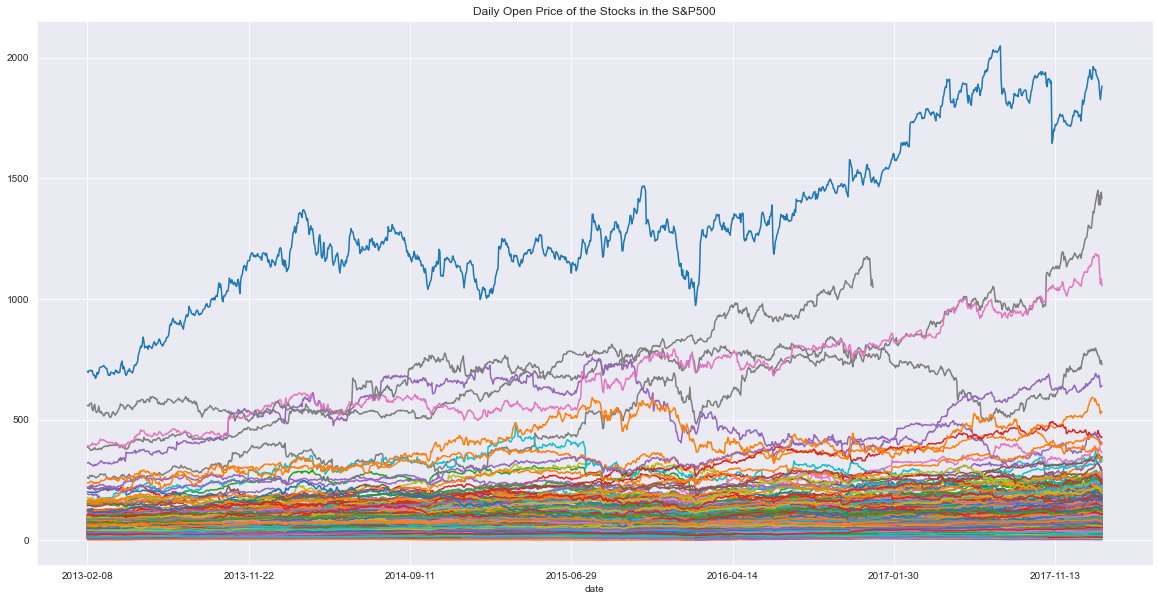

In [3]:
# Plotting
stocks.plot(title="Daily Open Price of the Stocks in the S&P500", legend=None, figsize=(20,10))
plt.show()

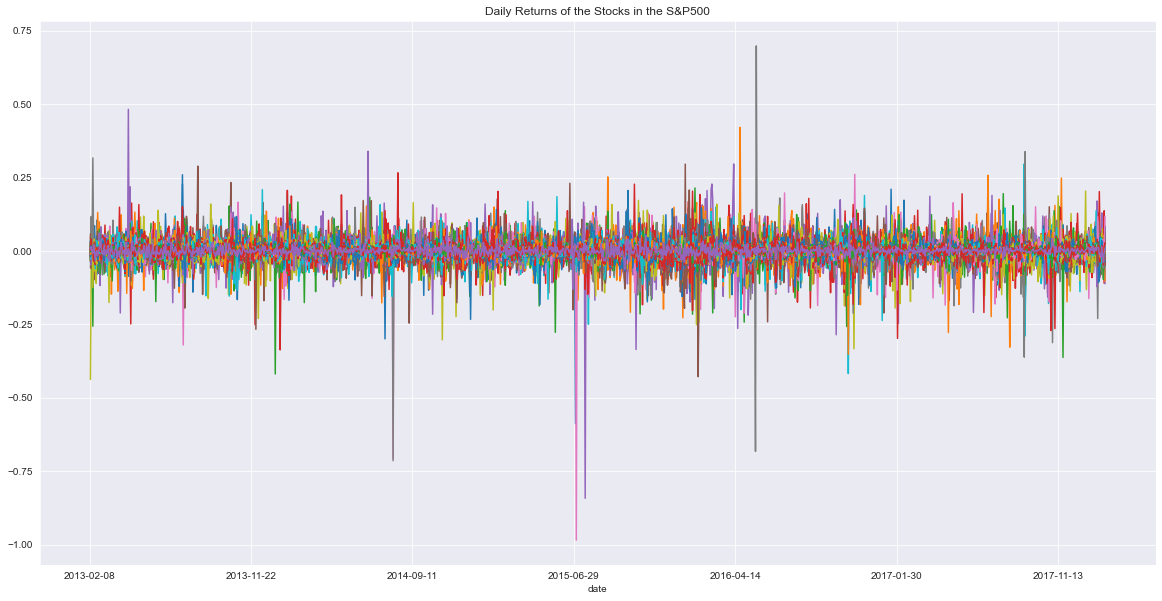

In [4]:
# Returns
returns = stocks.apply(np.log).diff(1)
returns.plot(title="Daily Returns of the Stocks in the S&P500", legend=None, figsize=(20,10))
plt.show()

C:\Users\Felipe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Felipe\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Felipe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Felipe\anaconda3\lib\site-

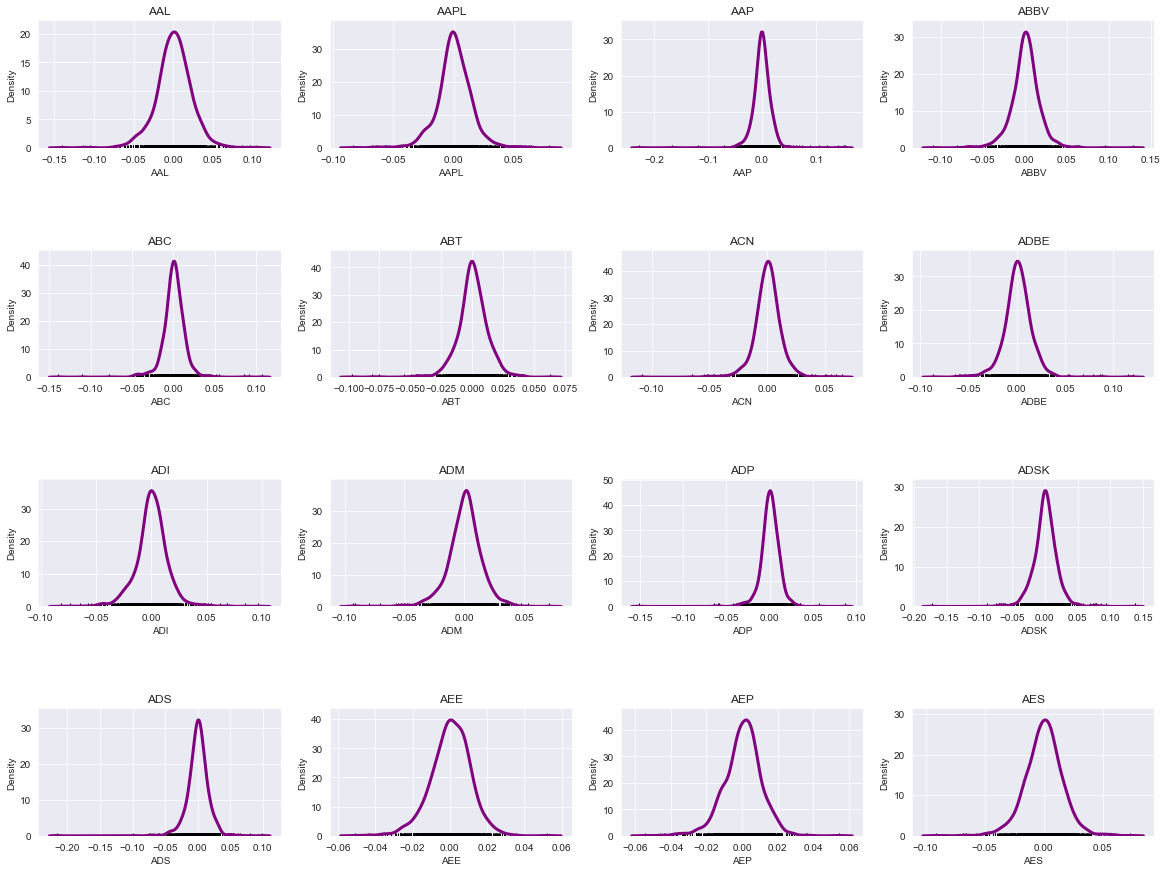

In [5]:
# Distribution of the returns
fig, ax = plt.subplots(4, 4, figsize=(20,15))
for i in range(16):
    sns.distplot(returns[returns.columns[i]], rug=True, hist=False,
                 rug_kws={"color": "black"}, kde_kws={"color": "purple", "lw": 3}, ax=ax[i//4,i%4])
    ax[i//4,i%4].set_title(returns.columns[i])
fig.subplots_adjust(hspace=0.8)
plt.show()

The returns seem to be log-normal, as expected.

#### Reconstructing the index S&P500 with the first principal component

In [6]:
# PCA
pca = PCA(100).fit(returns.fillna(0))
pc1 = pd.Series(index=returns.columns, data=pca.components_[0])

# Plotting the first component
#pc1.plot(xticks=[], title='First Principal Component of the S&P500', figsize=(12,7))
#plt.show()

In [7]:
# Constructing the portfolio
weights = abs(pc1)/sum(abs(pc1)) # l1norm = 1
portfolio_returns = (weights*returns).sum(1)
portfolio_returns.columns = ["PCA Portfolio"]
portfolio_PCA = portfolio_returns.cumsum().apply(np.exp)
portfolio_PCA = pd.DataFrame(portfolio_PCA, columns = ['PCA Portfolio'])

# Loading the S&P500
SP500 = pd.read_csv("SP500.csv")
SP500 = SP500[['Date', 'Open']]
SP500 = SP500.set_index('Date')

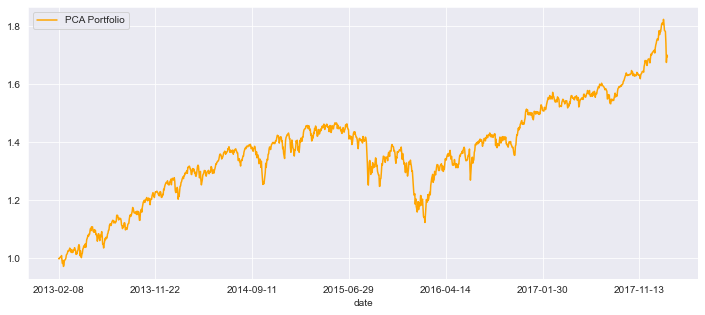

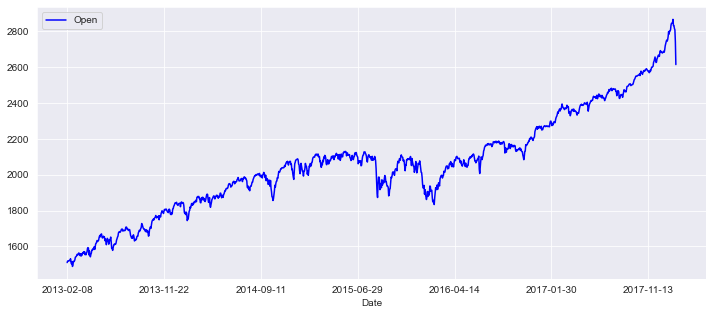

In [8]:
# Plotting the portfolio
portfolio_PCA.plot(label="PCA Portfolio", color='orange', figsize=(12,5))
SP500.plot(label="S&P500", color='blue', figsize=(12,5))
plt.show()

As we can see, the PCA portfolio is very similar to the S&P500, which reinforces the idea that the market factor of stock returns explains the biggest part of its variance.

#### Clustering the stocks according to their contribution to the first principal component

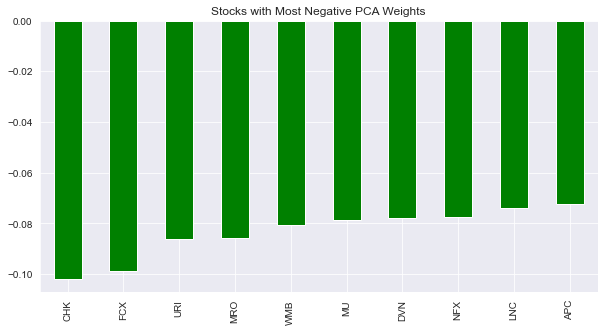

In [9]:
# Most negative weights
fig, ax = plt.subplots(figsize=(10,5))
pc1.nsmallest(10).plot.bar(ax=ax, color='green', grid=True, title='Stocks with Most Negative PCA Weights')
plt.show()

$\textbf{Most Negative PCA weights:}$
- CHK: Chesapeake Energy Corporation.
- FCX: Freeport-McMoRan (minerals).
- MRO: Marathon Oil Corporation.
- NFX: Nuformix (pharmaceutical).
- APC: Advanced Proteome Therapeutics Corporatn.
- INCY: Incyte Corporation (biopharmaceutical).
- MU: Micron Technology (semi-conductors).
- DNV: Devon Energy (natural gas and petrol).
- SWKS: Skyworks Solutions Inc (semi-conductors).

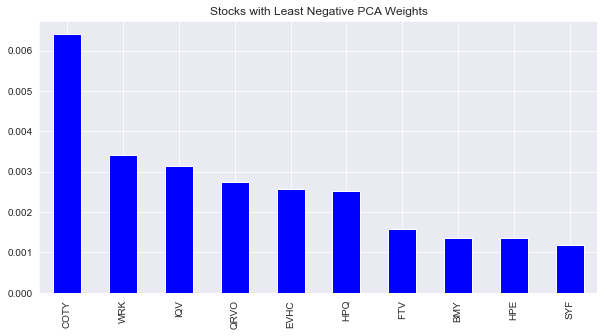

In [10]:
# Least negative weights
fig, ax = plt.subplots(figsize=(10,5))
pc1.nlargest(10).plot.bar(ax=ax, color='blue', grid=True, title='Stocks with Least Negative PCA Weights')
plt.show()

$\textbf{Least Negative PCA weights:}$
- APTV: Aptiv PLC (auto parts company).
- DXC: DXC Technology (IT).
- BHF: Brighthouse Financial Inc (life insurance).
- EVHC: Envision Healthcare Holdings (health and wellness).
- BHGE: Baker Hughes Company (oil field services).
- HLT: Hilton Worldwide (hotels).
- FTV: Fortive Corp (industrial technology).
- ED: Consolidated Edison (electricity).
- SO: Southern Co (energy and gas).

As we can see by the two plots above, without having any prior knowledge to the fundamentals, we could find gruops of stocks that are very uncorrelated and correlated to the market. The least negatively correlated ones are tied to services such as automobiles, technology, health, industry and electricity, which are linked to market growth. The most negatively correlated ones are tied to minerals, oil, semi-conductors and pharmceutical, which are related to the primary sector.